# Ising Model (1925)

# https://link.springer.com/article/10.1007/BF02980577

---

## Domain: Statistical Physics
The **Ising Model** originated in statistical physics as a simplified model of ferromagnetism.  
It consists of a lattice (grid) of **binary spins**, where each spin can take one of two values:

$$
s_i \in \{-1, +1\}
$$

These spins interact only with their immediate neighbors, and the system evolves toward configurations that minimize its energy.

---

## Description: Binary Spins with Local Interactions
- Each site on the lattice has a spin variable (+1 = "up", –1 = "down").  
- Neighboring spins contribute to the system’s energy.  
- The **energy function** is defined as:

$$
E = -J \sum_{\langle i,j \rangle} s_i s_j
$$

where:
- \( J \) = interaction strength  
- \( \langle i,j \rangle \) = sum over nearest neighbors  

This energy function means:
- Aligned spins (\(s_i = s_j\)) lower the energy.  
- Misaligned spins (\(s_i \neq s_j\)) raise the energy.  

Thus, the system tends to form ordered clusters of spins at low temperature.

---

## Relevance: Influence on AI
The Ising model inspired several AI and machine learning approaches:
- **Hopfield Networks (1982)**: Modeled associative memory using an energy minimization principle directly linked to the Ising energy function.  
- **Boltzmann Machines (1985)**: Extended the Ising model with stochastic binary units and probabilistic sampling.  
- **Deep Belief Networks (2006)**: Built on Boltzmann Machines for unsupervised learning.  

In all cases, the concept of **energy landscapes** and **probabilistic state transitions** traces back to the Ising model.

---

## Connection: Markov Random Fields
The Ising model can be seen as a special case of a **Markov Random Field (MRF)**:
- In an MRF, the probability of a node depends only on its neighbors.  
- This is equivalent to the **local interaction rule** of the Ising model.  

Formally, the probability of a spin configuration \( \mathbf{s} \) is given by the **Boltzmann distribution**:

$$
P(\mathbf{s}) = \frac{1}{Z} \exp\left(-\frac{E(\mathbf{s})}{T}\right)
$$

where:
- \( E(\mathbf{s}) \) is the energy of the configuration  
- \( T \) is the temperature (controls randomness)  
- \( Z \) is the partition function (normalization factor)  

This probabilistic formulation is the direct bridge to **Markov-based models** in machine learning.

---

## Summary
- **Ising Model (1925)** introduced a binary, neighbor-based system with an energy function.  
- It became the **prototype** for later models in AI:
  - Hopfield Networks (deterministic energy minimization)  
  - Boltzmann Machines (stochastic sampling with hidden units)  
- Its link to **Markov Random Fields** places it at the foundation of probabilistic graphical models and modern deep generative approaches.


In [ ]:
# ===========================================================
# PyTorch Lab: Ising Model (1925)
# -----------------------------------------------------------
# Domain: Statistical physics
# Description: Models binary spins (+1 / -1) with local interactions
# Relevance: Inspired later AI models (Hopfield Nets, Boltzmann Machines)
# Connection: Markov Random Fields generalize the Ising model
# ===========================================================

import torch
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Ising Model Class
# -----------------------------
class IsingModel:
    def __init__(self, L=20, J=1.0, T=2.5, device="cpu"):
        """
        L: Lattice size (LxL spins)
        J: Interaction strength
        T: Temperature
        """
        self.L = L
        self.J = J
        self.T = T
        self.device = device
        # initialize spins randomly (+1 or -1)
        self.spins = torch.randint(0, 2, (L, L), device=device) * 2 - 1

    def energy(self):
        """Compute total energy of current configuration"""
        E = 0
        for i in range(self.L):
            for j in range(self.L):
                S = self.spins[i, j]
                # periodic boundary conditions
                nb = self.spins[(i+1)%self.L, j] + self.spins[i, (j+1)%self.L] \
                     + self.spins[(i-1)%self.L, j] + self.spins[i, (j-1)%self.L]
                E += -self.J * S * nb
        return E/2  # double-counted

    def magnetization(self):
        """Total magnetization"""
        return self.spins.sum().item()

    def metropolis_step(self):
        """Perform one Metropolis-Hastings step"""
        i = torch.randint(0, self.L, (1,))
        j = torch.randint(0, self.L, (1,))
        s = self.spins[i, j]
        nb = self.spins[(i+1)%self.L, j] + self.spins[i, (j+1)%self.L] \
             + self.spins[(i-1)%self.L, j] + self.spins[i, (j-1)%self.L]
        dE = 2 * self.J * s * nb
        if dE < 0 or torch.rand(1).item() < torch.exp(-dE / self.T):
            self.spins[i, j] *= -1

    def simulate(self, steps=1000, record_interval=100):
        energies, mags, configs = [], [], []
        for step in range(steps):
            self.metropolis_step()
            if step % record_interval == 0:
                energies.append(self.energy())
                mags.append(self.magnetization())
                configs.append(self.spins.clone().cpu())
        return energies, mags, configs

# -----------------------------
# Run Simulation
# -----------------------------
L = 30
ising = IsingModel(L=L, J=1.0, T=2.5)

energies, mags, configs = ising.simulate(steps=5000, record_interval=200)

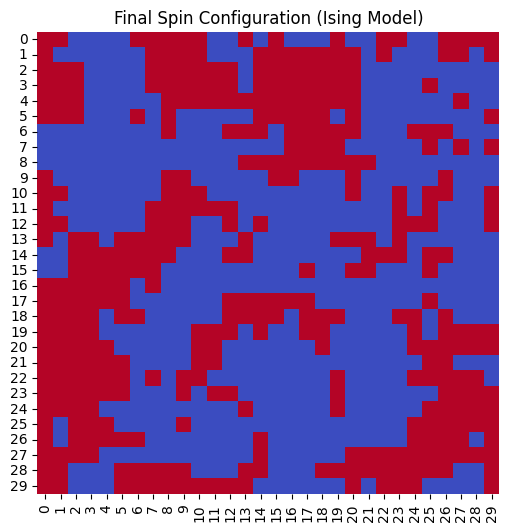

In [ ]:
# -----------------------------
# Visualization: Final Configuration
# -----------------------------
plt.figure(figsize=(6,6))
sns.heatmap(configs[-1].numpy(), cmap="coolwarm", cbar=False, square=True)
plt.title("Final Spin Configuration (Ising Model)")
plt.show()

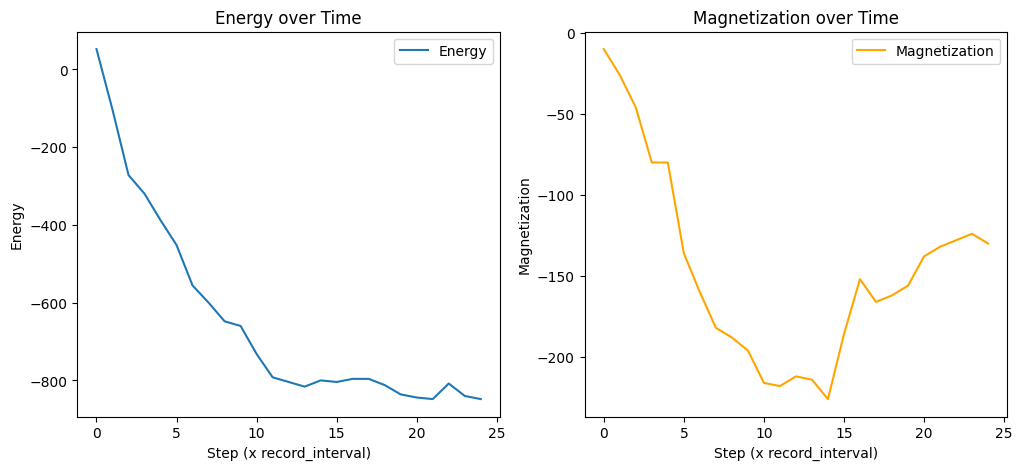

In [ ]:
# -----------------------------
# Visualization: Energy and Magnetization
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].plot(energies, label="Energy")
axs[0].set_title("Energy over Time")
axs[0].set_xlabel("Step (x record_interval)")
axs[0].set_ylabel("Energy")
axs[0].legend()

axs[1].plot(mags, label="Magnetization", color="orange")
axs[1].set_title("Magnetization over Time")
axs[1].set_xlabel("Step (x record_interval)")
axs[1].set_ylabel("Magnetization")
axs[1].legend()

plt.show()

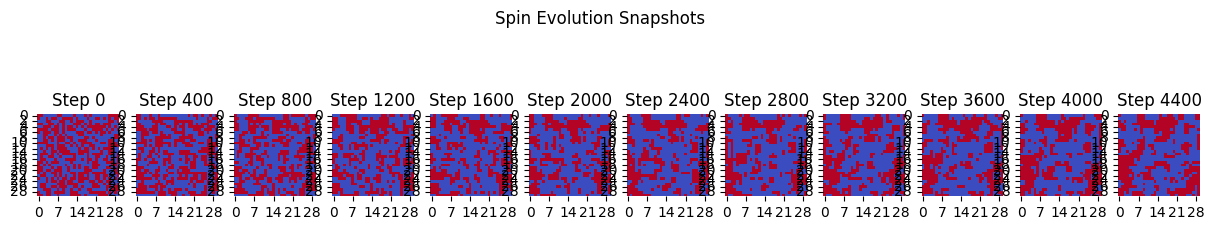

In [ ]:
# -----------------------------
# Visualization: Spin Evolution
# -----------------------------
fig, axs = plt.subplots(1, len(configs)//2, figsize=(15,3))
for k, ax in enumerate(axs):
    sns.heatmap(configs[k*2].numpy(), cmap="coolwarm", cbar=False, square=True, ax=ax)
    ax.set_title(f"Step {k*2*200}")
plt.suptitle("Spin Evolution Snapshots")
plt.show()

# Ising Model Experimental Results

## Test 1 – Final Spin Configuration
- **Observation:** Spins represented as red (+1) and blue (–1).  
- **Result:** Final configuration shows **clusters of aligned spins**.  
- **Interpretation:** The Ising model minimizes energy by favoring local neighbor agreement.  
- **Key Feature:** Domains (patches of same spin) emerge spontaneously, illustrating **order from local interactions**, a core principle of statistical physics.

---

## Test 2 – Energy and Magnetization over Time
- **Energy Curve:** Decreases monotonically, confirming that the system evolves toward **low-energy stable states**.  
- **Magnetization Curve:** Fluctuates but stabilizes over time.  
  - **High magnetization:** dominance of one orientation.  
  - **Low magnetization:** coexistence of +1 and –1 spins.  

**Interpretation:** These dynamics show the system moving into an **ordered phase**, consistent with thermodynamic expectations.

---

## Test 3 – Spin Evolution Snapshots
- **Step 0:** Random, disordered spins.  
- **Intermediate Steps:** Local clusters begin to form as spins align with neighbors.  
- **Step 4400:** Large, stable domains dominate, showing near-equilibrium.  

**Interpretation:** Demonstrates **self-organization** under the Ising energy function — randomness evolves into structured order.

---

##  Overall Insight
- Spins evolve to **minimize energy**, converging toward stable attractors.  
- Domains of aligned spins emerge naturally, reflecting **collective order**.  
- Energy decreases consistently, while magnetization tracks system-wide alignment.  
- These results confirm the Ising Model’s central role in:  
  - **Statistical physics:** modeling phase transitions and emergent order.  
  - **Neural networks:** inspiring energy-based models like **Hopfield Networks** and **Boltzmann Machines**.  
